In [1]:
from imp import reload
import pandas as pd
from collections import Counter
from __future__ import division
import pandas as pd
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [2]:
dir_ = '/Users/MeryemMhamdi/Dropbox/meryem/Deliverables/3. Algorithms and Results/EmotionRecognition/Results' 

In [3]:
human_annotations = pd.read_excel("/Users/MeryemMhamdi/Dropbox/meryem/Deliverables/6. Human Validation/human_annotations.xls")
emo_dict= {
    'Involvement-Interest': 1, 
    'Amusement-Laughter' : 2, 
    'Pride-Elation':3, 
    'Happiness-Joy':4,
    'Enjoyment-Pleasure':5,
    'Tenderness-Feeling Love':6,
    'Love':6,
    'Wonderment-Feeling Awe':7,
    'Feeling Disburdened- Relief':8, 
    'Astonishment- Surprise':9,
    'Longing- Nostalgia':10,
    'Pity-Compassion':11,
    'Sadness-Despair':12,
    'Worry-Fear':13,
    'Embarrassement-Shame':14,
    'Guilt-Remorse':15,
    'Disappointment- Regret':16,
    'Envy-Jealousy':17,
    'Disgust-Repulsion':18,
    'Contempt-Scorn':19,
    'Irritation-Anger':20,
    'Neutral':21,
    'No Emotion':21,
    'Arrogance-Disdain':22,
    'Boredom':23,
    'Light heartedness ':24,
    'Involvement':1,
    'Amusement':2,
    'Pride':3,
    'Happiness':4,
    'Pleasure':5,
    'Love':6,
    'Awe':7,
    'Relief':8,
    'Surprise':9,
    'Nostalgia':10,
    'Pity':11,
    'Sadness':12,
    'Worry':13,
    'Shame':14,
    'Guilt':15,
    'Regret':16,
    'Envy':17,
    'Disgust':18,
    'Contempt':19,
    'Anger':20,
    'No Emotion':21,
    'Other Emotion':22
}

crowdsourced_emotions_IDs = human_annotations['Crowdsourced Truth IDs'] = human_annotations['Crowdsourced Truth'].map(emo_dict)
crowdsourced_emotions_IDs.head()

726       6
4622     19
6981      5
8920      6
13050     3
Name: Crowdsourced Truth, dtype: int64

In [4]:
list_individual_emotions = []
for i in range(1,22):
    list_individual_emotions_sub = []
    for crowdsourced_emotion in crowdsourced_emotions_IDs:
        if crowdsourced_emotion==i:
            list_individual_emotions_sub.append(1)
        else:
            list_individual_emotions_sub.append(0)
    list_individual_emotions.append(list_individual_emotions_sub)

# Initial Classifier:

In [8]:
# Pasting the results of Initial Classifier from Baseline Method
list_emotions = [
"Love",
"No Emotion",
"Pleasure",
"Involvement",
"No Emotion",
"Amusement",
"No Emotion",
"Involvement",
"Anger",
"Love",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"Happiness",
"Worry",
"No Emotion",
"Love",
"No Emotion",
"No Emotion",
"No Emotion",
"Shame",
"Worry",
"Pleasure",
"No Emotion",
"No Emotion",
"Anger",
"Love",
"Happiness",
"No Emotion",
"Happiness",
"Worry",
"Happiness",
"Love",
"Happiness",
"No Emotion",
"No Emotion",
"No Emotion",
"Amusement",
"No Emotion",
"Awe",
"Love",
"Love",
"No Emotion",
"No Emotion",
"Love",
"Anger",
"No Emotion",
"No Emotion",
"Worry",
"No Emotion",
"Worry",
"No Emotion",
"Worry",
"Love",
"No Emotion",
"No Emotion",
"Love",
"Awe",
"Worry",
"Amusement",
"Pleasure",
"Happiness",
"No Emotion",
"Amusement",
"Happiness",
"Involvement",
"Regret",
"Shame",
"Love",
"No Emotion",
"Worry",
"Sadness",
"No Emotion",
"No Emotion",
"Love",
"No Emotion",
"Love",
"Anger",
"Love",
"Awe",
"Happiness",
"No Emotion",
"Happiness",
"Amusement",
"No Emotion",
"Love",
"Love",
"Amusement",
"No Emotion",
"Love",
"No Emotion",
"No Emotion",
"Worry",
"Pride",
"No Emotion",
"Worry",
"Involvement",
"Love",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"Worry",
"Nostalgia",
"No Emotion",
"No Emotion",
"Involvement",
"Relief",
"Pleasure",
"No Emotion",
"Love",
"Love",
"Sadness",
"Love",
"Awe",
"Happiness",
"Love",
"Shame",
"Anger",
"Sadness",
"Awe",
"No Emotion",
"Anger",
"Surprise",
"Anger",
"Worry",
"Guilt",
"Surprise",
"No Emotion",
"No Emotion",
"Awe",
"Nostalgia",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"Shame",
"Nostalgia",
"No Emotion",
"Love",
"Nostalgia",
"Involvement",
"Love",
"Nostalgia",
"Amusement",
"Surprise",
"Love",
"Love",
"Involvement",
"Happiness",
"No Emotion",
"Worry",
"No Emotion",
"Worry",
"Awe",
"Awe",
"No Emotion",
"Awe",
"Awe",
"Love",
"No Emotion",
"Love",
"No Emotion",
"Amusement",
"No Emotion",
"No Emotion",
"Amusement",
"No Emotion",
"Love",
"Worry",
"Pride",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"No Emotion",
"Worry",
"Surprise",
"Regret",
"Amusement",
"Sadness",
"No Emotion",
"Love",
"No Emotion",
"Shame",
"Worry",
"Anger",
"Worry",
"Awe",
"No Emotion",
"Pride",
"Worry",
"No Emotion",
"Sadness",
"Happiness",
"No Emotion",
"Love",
"No Emotion",
"No Emotion",
"Pleasure",
"No Emotion",
"Awe",
"Love",
"Worry",
"Anger",
"No Emotion",
"No Emotion",
"No Emotion",
"Sadness",
"Guilt",
"Involvement",
"Love",
"Worry",
"No Emotion",
"Disgust",
"Love",
"No Emotion",
"Worry",
"Love",
"Sadness",
"Worry",
"Nostalgia",
"No Emotion",
"Anger",
"Love",
"No Emotion",
"Love",
"Love",
"No Emotion",
"No Emotion",
"No Emotion",
"Involvement",
"Love",
"Worry",
"Happiness",
"No Emotion",
"Love",
"No Emotion",
"Happiness",
"Happiness",
"No Emotion",
"No Emotion",
"Happiness",
"Happiness",
"No Emotion",
"No Emotion",
"Love"]

In [9]:
list_emotions_IDs = []
for i in range(0,len(list_emotions)):
    list_emotions_IDs.append(emo_dict[list_emotions[i]])

In [10]:
from sklearn import metrics
print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, list_emotions_IDs))

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, list_emotions_IDs, average='micro'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, list_emotions_IDs, average='micro'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, list_emotions_IDs, average='micro'))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, list_emotions_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, list_emotions_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, list_emotions_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, list_emotions_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

Accuracy Score:  0.248
micro Precision Score:  0.248
micro Recall Score:  0.248
micro f1_score:  0.248
macro Precision Score:  0.233327681969
macro Recall Score:  0.203730562738
macro f1_score:  0.170879954208
roc_auc_score:  0.473455598456


In [11]:
list_individual_emotions_lexicon = []
for i in range(1,22):
    list_individual_emotions_sub_lexicon = []
    for lexicon_emotion in list_emotions_IDs:
        if lexicon_emotion ==i:
            list_individual_emotions_sub_lexicon.append(1)
        else:
            list_individual_emotions_sub_lexicon.append(0)
    list_individual_emotions_lexicon.append(list_individual_emotions_sub_lexicon)

In [12]:
from sklearn import metrics

#i = 1
#print('micro Precision Score: ',metrics.precision_score(list_individual_emotions[i],list_individual_emotions_lexicon[i] ))
#print('micro Recall Score: ',metrics.recall_score(list_individual_emotions[i],list_individual_emotions_lexicon[i] ))
for i in range(10,21):
    print('micro f1_score: ',metrics.f1_score(list_individual_emotions[i],list_individual_emotions_lexicon[i]))

micro f1_score:  0.0
micro f1_score:  0.166666666667
micro f1_score:  0.44
micro f1_score:  0.333333333333
micro f1_score:  0.4
micro f1_score:  0.0
micro f1_score:  0.0
micro f1_score:  0.222222222222
micro f1_score:  0.0
micro f1_score:  0.16
micro f1_score:  0.117647058824


# I. Lexicon Based Approach

In [13]:
lexicon_based = pd.read_csv(dir_+'/LexiconBased/Tweets_Labelled_Lexicon_Whole.csv')
lexicon_based_IDs = lexicon_based['Crowdsourced Truth IDs'] = lexicon_based['Emotion'].map(emo_dict)
lexicon_validation_set_IDs = lexicon_based_IDs.ix[crowdsourced_emotions_IDs.index]
lexicon_based.head()

,Unnamed: 0,Nava Tweet,Emotion,Crowdsourced Truth IDs
0,0,"[u'photon', u'direct', u'plane', u'slit', u'slit', u'observe', u'slit', u'unobserved', u'observe', u'leave', u'plane', u'hit', u'target', u'slit', 'not_go', 'not_go']",Neutral,21
1,1,"[u'agree', u'point']",Neutral,21
2,2,"[u'think', u'good', u'tee', u'shirt', 'not_point']",Neutral,21
3,3,[u'excuse'],Neutral,21
4,4,[u'hang'],Neutral,21


In [14]:
lexicon_validation_set_IDs.head()

726       6
4622      2
6981      5
8920      1
13050    21
Name: Emotion, dtype: int64

## 1. General:

In [15]:
from sklearn import metrics
print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs))

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, average='weighted'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, average='weighted'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, average='weighted'))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, lexicon_validation_set_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

Accuracy Score:  0.332
micro Precision Score:  0.32406225653
micro Recall Score:  0.332
micro f1_score:  0.298696936884
macro Precision Score:  0.241424404053
macro Recall Score:  0.256345689985
macro f1_score:  0.202941920492
roc_auc_score:  0.586631274131


## 2. Fine-Grained:

In [16]:
list_individual_emotions_lexicon = []
for i in range(1,22):
    list_individual_emotions_sub_lexicon = []
    for lexicon_emotion in lexicon_validation_set_IDs:
        if lexicon_emotion ==i:
            list_individual_emotions_sub_lexicon.append(1)
        else:
            list_individual_emotions_sub_lexicon.append(0)
    list_individual_emotions_lexicon.append(list_individual_emotions_sub_lexicon)

In [17]:
from sklearn import metrics

i = 0
print('micro Precision Score: ',metrics.precision_score(list_individual_emotions[i],list_individual_emotions_lexicon[i] ))
print('micro Recall Score: ',metrics.recall_score(list_individual_emotions[i],list_individual_emotions_lexicon[i] ))
print('micro f1_score: ',metrics.f1_score(list_individual_emotions[i],list_individual_emotions_lexicon[i]))

micro Precision Score:  0.642857142857
micro Recall Score:  0.428571428571
micro f1_score:  0.514285714286


# II. PMI Based Approach

In [18]:
pmi_based = pd.read_csv(dir_+'/PMIBased/Tweets_Labelled_PMI_NEW.csv')
pmi_based_IDs = pmi_based['Crowdsourced Truth IDs'] = pmi_based['Emotion'].map(emo_dict)
pmi_validation_set_IDs = pmi_based_IDs.ix[crowdsourced_emotions_IDs.index]
pmi_based.head()

,Unnamed: 0,Nava Tweet,Emotion,Crowdsourced Truth IDs
0,0,"['photon', 'direct', 'plane', 'slit', 'slit', 'observe', 'slit', 'unobserved', 'observe', 'leave', 'plane', 'hit', 'target', 'slit', 'not_go', 'not_go']",Neutral,21
1,1,"['agree', 'point']",Contempt-Scorn,19
2,2,"['think', 'good', 'tee', 'shirt', 'not_point']",Neutral,21
3,3,['excuse'],Pity-Compassion,11
4,4,['hang'],Embarrassement-Shame,14


In [19]:
from sklearn import metrics
print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs))

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='weighted'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='weighted'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='weighted'))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, pmi_validation_set_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

Accuracy Score:  0.336
micro Precision Score:  0.327854108211
micro Recall Score:  0.336
micro f1_score:  0.310269164168
macro Precision Score:  0.220756779452
macro Recall Score:  0.261372219828
macro f1_score:  0.21090649437
roc_auc_score:  0.602075289575


In [20]:
from sklearn import metrics
print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs))

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='micro'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='micro'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='micro'))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, pmi_validation_set_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

Accuracy Score:  0.336
micro Precision Score:  0.336
micro Recall Score:  0.336
micro f1_score:  0.336
macro Precision Score:  0.220756779452
macro Recall Score:  0.261372219828
macro f1_score:  0.21090649437
roc_auc_score:  0.602075289575


## 1. General:

In [21]:
from sklearn import metrics
print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs))

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='micro'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='micro'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='micro'))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, pmi_validation_set_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, pmi_validation_set_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

Accuracy Score:  0.336
micro Precision Score:  0.336
micro Recall Score:  0.336
micro f1_score:  0.336
macro Precision Score:  0.220756779452
macro Recall Score:  0.261372219828
macro f1_score:  0.21090649437
roc_auc_score:  0.602075289575


## 2. Fine-Grained:

In [22]:
list_individual_emotions_pmi = []
for i in range(1,22):
    list_individual_emotions_sub_pmi = []
    for pmi_emotion in pmi_validation_set_IDs:
        if pmi_emotion ==i:
            list_individual_emotions_sub_pmi.append(1)
        else:
            list_individual_emotions_sub_pmi.append(0)
    list_individual_emotions_pmi.append(list_individual_emotions_sub_pmi)

In [23]:
from sklearn import metrics

i = 19
print('micro Precision Score: ',metrics.precision_score(list_individual_emotions[i],list_individual_emotions_pmi[i] ))
print('micro Recall Score: ',metrics.recall_score(list_individual_emotions[i],list_individual_emotions_pmi[i] ))
print('micro f1_score: ',metrics.f1_score(list_individual_emotions[i],list_individual_emotions_pmi[i]))

micro Precision Score:  0.142857142857
micro Recall Score:  0.133333333333
micro f1_score:  0.137931034483


# III. Word2Vec Based Approach

In [24]:
word2vec_based = pd.read_csv(dir_+'/Word2VecBased/Tweets_Labelled_Word2Vec_Whole.csv')
word2vec_based_IDs = word2vec_based['Crowdsourced Truth IDs'] = word2vec_based['Emotion'].map(emo_dict)
word2vec_validation_set_IDs = word2vec_based_IDs.ix[crowdsourced_emotions_IDs.index]
word2vec_based.head()

,Unnamed: 0,Nava Tweet,Emotion,Crowdsourced Truth IDs
0,0,"[u'photon', u'direct', u'plane', u'slit', u'slit', u'observe', u'slit', u'unobserved', u'observe', u'leave', u'plane', u'hit', u'target', u'slit', 'not_go', 'not_go']",Envy-Jealousy,17
1,1,"[u'agree', u'point']",Enjoyment-Pleasure,5
2,2,"[u'think', u'good', u'tee', u'shirt', 'not_point']",Envy-Jealousy,17
3,3,[u'excuse'],Feeling Disburdened- Relief,8
4,4,[u'hang'],Feeling Disburdened- Relief,8


## 1. General:

In [25]:
from sklearn import metrics

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, average='micro'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, average='micro'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, average='micro'))

print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, word2vec_validation_set_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

micro Precision Score:  0.32
micro Recall Score:  0.32
micro f1_score:  0.32
Accuracy Score:  0.32
macro Precision Score:  0.218537104367
macro Recall Score:  0.256193064833
macro f1_score:  0.206513166147
roc_auc_score:  0.574485199485


## 2. Fine-Grained:

In [26]:
list_individual_emotions_word2vec = []
for i in range(1,22):
    list_individual_emotions_sub_word2vec = []
    for word2vec_emotion in word2vec_validation_set_IDs:
        if word2vec_emotion ==i:
            list_individual_emotions_sub_word2vec.append(1)
        else:
            list_individual_emotions_sub_word2vec.append(0)
    list_individual_emotions_word2vec.append(list_individual_emotions_sub_word2vec)

In [27]:
from sklearn import metrics

i = 19
print('micro Precision Score: ',metrics.precision_score(list_individual_emotions[i],list_individual_emotions_word2vec[i] ))
print('micro Recall Score: ',metrics.recall_score(list_individual_emotions[i],list_individual_emotions_word2vec[i] ))
print('micro f1_score: ',metrics.f1_score(list_individual_emotions[i],list_individual_emotions_word2vec[i]))

micro Precision Score:  0.125
micro Recall Score:  0.133333333333
micro f1_score:  0.129032258065


# IV. Random Forest Approach

In [28]:
import pandas as pd
# /home/meryem/Dropbox/meryem/algorithms/EmotionRecognition/FinalResults/RF_300dim_10trees_dom_adapt.csv
# /home/meryem/Dropbox/meryem/algorithms/EmotionRecognition/FinalResults/Semi-Supervised/NB_bernoulli_no_cv_no_dom_adapt.csv
# /home/meryem/Dropbox/meryem/algorithms/EmotionRecognition/FinalResults/Semi-Supervised/RF_10dim_10trees_no_dom_adapt.csv
rf = pd.read_csv(dir_+'/Semi-Supervised/NB_bernoulli_no_cv_no_dom_adapt.csv')
rf.columns
rf_IDs = rf['Naive Bayes No c No domain Adaptation'] # 'RF 300 dim 10 trees'
rf_validation_set_IDs = rf_IDs.ix[crowdsourced_emotions_IDs.index]

[[ 1  0  0  0  0  1  0  1  0  0 11  0  2  0  0  0  0  3  0  2  0  0  0  0]
 [ 1  3  0  0  0  2  0  0  1  2  3  0  0  0  3  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  1  1  0  0  0  0  0  0  2  0  1  0  0  0  0]
 [ 0  1  1  0  0  6  5  0  1  1  7  0  0  0  3  0  1  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  1  0  0  0  7  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  4  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  1  1  0  0  0  2  7  0  0  0  1  0  0  2  1  1  0  0  0  0]
 [ 1  0  0  0  0  2  3  0  0  3  5  0  4  1  1  0  0  3  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

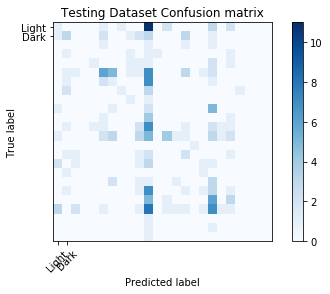

In [29]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
cm=metrics.confusion_matrix(crowdsourced_emotions_IDs, rf_validation_set_IDs)
print(cm)
%matplotlib inline
plot_confusion_matrix(cm, classes=['Light','Dark'],
                      title='Testing Dataset Confusion matrix')

## 1. General:

In [30]:
from sklearn import metrics

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, rf_validation_set_IDs, average='micro'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, rf_validation_set_IDs, average='micro'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, rf_validation_set_IDs, average='micro'))

print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, rf_validation_set_IDs))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, rf_validation_set_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, rf_validation_set_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, rf_validation_set_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, rf_validation_set_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

micro Precision Score:  0.124
micro Recall Score:  0.124
micro f1_score:  0.124
Accuracy Score:  0.124
macro Precision Score:  0.13281119619
macro Recall Score:  0.144331883394
macro f1_score:  0.103868763632
roc_auc_score:  0.544803732304


## 2. Fine-Grained:

In [31]:
list_individual_emotions_rf = []
for i in range(1,22):
    list_individual_emotions_sub_rf = []
    for rf_emotion in rf_validation_set_IDs:
        if rf_emotion ==i:
            list_individual_emotions_sub_rf.append(1)
        else:
            list_individual_emotions_sub_rf.append(0)
    list_individual_emotions_rf.append(list_individual_emotions_sub_rf)

In [32]:
from sklearn import metrics

i = 19
print('micro Precision Score: ',metrics.precision_score(list_individual_emotions[i],list_individual_emotions_rf[i] ))
print('micro Recall Score: ',metrics.recall_score(list_individual_emotions[i],list_individual_emotions_rf[i] ))
print('micro f1_score: ',metrics.f1_score(list_individual_emotions[i],list_individual_emotions_rf[i]))

micro Precision Score:  0.214285714286
micro Recall Score:  0.2
micro f1_score:  0.206896551724


#  V. Voting Model:

In [33]:
majority_voting_df = pd.read_csv(dir_+'/MajorityVoting/majority_voting.csv')
majority_voting_IDs = majority_voting_df['Emotion ID']
majority_voting_IDs = majority_voting_IDs.ix[crowdsourced_emotions_IDs.index]

## 1. General:

In [34]:
from sklearn import metrics

print('micro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, majority_voting_IDs, average='micro'))
print('micro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, majority_voting_IDs, average='micro'))
print('micro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, majority_voting_IDs, average='micro'))

print('Accuracy Score: ',metrics.accuracy_score(crowdsourced_emotions_IDs, majority_voting_IDs))

print('macro Precision Score: ',metrics.precision_score(crowdsourced_emotions_IDs, majority_voting_IDs, average='macro'))
print('macro Recall Score: ',metrics.recall_score(crowdsourced_emotions_IDs, majority_voting_IDs, average='macro'))
print('macro f1_score: ',metrics.f1_score(crowdsourced_emotions_IDs, majority_voting_IDs, average='macro'))


# Customized Version of AUC for multiple classes
fpr, tpr, thresholds = metrics.roc_curve(crowdsourced_emotions_IDs, majority_voting_IDs, pos_label=21)
print('roc_auc_score: ',metrics.auc(fpr, tpr))

micro Precision Score:  0.332
micro Recall Score:  0.332
micro f1_score:  0.332
Accuracy Score:  0.332
macro Precision Score:  0.228306871331
macro Recall Score:  0.263604362685
macro f1_score:  0.212445588403
roc_auc_score:  0.564832689833


## 2. Fine-Grained:

In [35]:
list_individual_emotions_vm = []
for i in range(1,22):
    list_individual_emotions_sub_vm = []
    for vm_emotion in majority_voting_IDs:
        if vm_emotion ==i:
            list_individual_emotions_sub_vm.append(1)
        else:
            list_individual_emotions_sub_vm.append(0)
    list_individual_emotions_vm.append(list_individual_emotions_sub_vm)

In [36]:
from sklearn import metrics

i = 19
print('micro Precision Score: ',metrics.precision_score(list_individual_emotions[i],list_individual_emotions_vm[i] ))
print('micro Recall Score: ',metrics.recall_score(list_individual_emotions[i],list_individual_emotions_vm[i] ))
print('micro f1_score: ',metrics.f1_score(list_individual_emotions[i],list_individual_emotions_vm[i]))

micro Precision Score:  0.142857142857
micro Recall Score:  0.133333333333
micro f1_score:  0.137931034483
